In [ ]:
import numpy as np
import random

# Define environment
rows, cols = 2, 3

# States (each cell in the grid)
states = [(i, j) for i in range(rows) for j in range(cols)]

# Rewards
rewards = np.zeros((rows, cols))
rewards[1, 0] = -10  # Poison
rewards[1, 2] = 10   # Big cheese

# Actions
actions = ['up', 'down', 'left', 'right']

# Parameters
alpha = 0.1    # learning rate
gamma = 0.99   # discount rate
epsilon = 0.2  # exploration rate

# Q-table
Q = {}
for s in states:
    Q[s] = {a: 0 for a in actions}

# Function to get next state
def next_state(state, action):
    i, j = state
    if action == 'up' and i > 0:
        i -= 1
    elif action == 'down' and i < rows - 1:
        i += 1
    elif action == 'left' and j > 0:
        j -= 1
    elif action == 'right' and j < cols - 1:
        j += 1
    return (i, j)

# Function to check terminal state
def is_terminal(state):
    return state in [(1, 0), (1, 2)]  # poison or big cheese

# Training
for episode in range(5000):
    state = (0, 0)  # start
    step = 0
    while not is_terminal(state) and step < 5:
        step += 1

        # Choose action (epsilon-greedy)
        if random.uniform(0, 1) < epsilon:
            action = random.choice(actions)
        else:
            action = max(Q[state], key=Q[state].get)

        new_state = next_state(state, action)
        reward = rewards[new_state]

        # Q-learning formula
        Q[state][action] += alpha * (reward + gamma * max(Q[new_state].values()) - Q[state][action])

        state = new_state

# Display learned Q-values
print("\nLearned Q-values:")
for s in Q:
    print(f"{s}: {Q[s]}")

# Optimal policy
print("\nOptimal policy:")
for i in range(rows):
    for j in range(cols):
        state = (i, j)
        if is_terminal(state):
            print(" T ", end=" ")
        else:
            print(f" {max(Q[state], key=Q[state].get)[0].upper()} ", end=" ")
    print()


Learned Q-values:
(0, 0): {'up': np.float64(9.702817723864746), 'down': np.float64(-9.999999999999993), 'left': np.float64(9.702980885672643), 'right': np.float64(9.800999999999977)}
(0, 1): {'up': np.float64(9.800925955857702), 'down': np.float64(9.899999999999984), 'left': np.float64(9.70270587186373), 'right': np.float64(9.702288101890622)}
(0, 2): {'up': np.float64(4.485379236152498), 'down': np.float64(3.439), 'left': np.float64(9.800933533742766), 'right': np.float64(4.380279644931002)}
(1, 0): {'up': 0, 'down': 0, 'left': 0, 'right': 0}
(1, 1): {'up': np.float64(9.800491214026017), 'down': np.float64(9.899861870760494), 'left': np.float64(-9.999704873345692), 'right': np.float64(9.999999999999993)}
(1, 2): {'up': 0, 'down': 0, 'left': 0, 'right': 0}

Optimal policy:
 R   D   L  
 T   R   T  



BELLMAN EQUATION EXPLANATION

The Bellman Equation is the core of Q-Learning:

Q(St, At) ← Q(St, At) + α[Rt+1 + γ·max_a(Q(St+1, a)) - Q(St, At)]

Where:
  • St        = Current state
  • At        = Action taken in current state
  • Q(St,At)  = Current Q-value (expected future reward)
  • α         = Learning rate (0.1) - how fast we learn
  • Rt+1      = Immediate reward received
  • γ         = Discount factor (0.99) - importance of future rewards
  • max_a(Q(St+1, a)) = Best Q-value in next state

Key Components:
  1. Target = Rt+1 + γ·max_a(Q(St+1, a))
     → What we think the Q-value SHOULD be

  2. TD Error = Target - Q(St, At)
     → How wrong our current estimate is (Temporal Difference)

  3. Update = Q(St, At) + α·TD_Error
     → Adjust Q-value toward the target

Example from your slides:
  • From State 2, action Down (↓)
  • Immediate reward: -10 (went to poison)
  • Q(State 2, Down) = 0 + 0.1 × [-10 + 0.99 × 0 - 0]
  • Q(State 2, Down) = 0 + 0.1 × [-10]
  • Q(State 2, Down

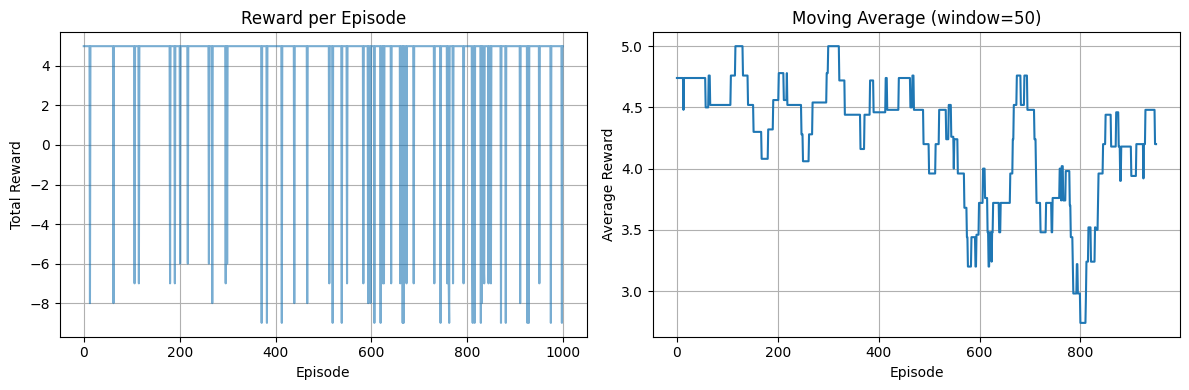

/tmp/ipython-input-1107144601.py:248: UserWarning: Glyph 129472 (\N{CHEESE WEDGE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


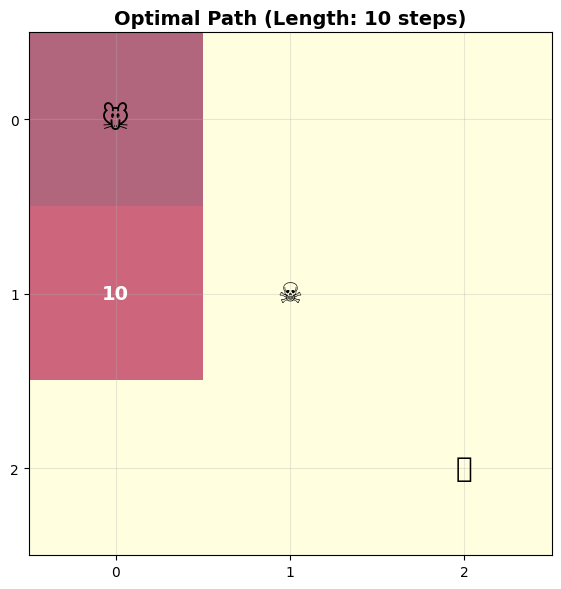

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from collections import deque

# Environment Setup
class MouseMaze:
    def __init__(self):
        # 3x3 maze grid
        # States: 0-8 (0=start/mouse position, 8=cheese goal, 4=poison)
        self.grid_size = 3
        self.total_states = 9
        self.actions = ['←', '→', '↑', '↓']  # Left, Right, Up, Down
        self.num_actions = 4

        # Position mapping
        self.start_pos = 0
        self.poison_pos = 4
        self.goal_pos = 8
        self.max_steps = 5

    def pos_to_coord(self, pos):
        """Convert position to (row, col)"""
        return (pos // 3, pos % 3)

    def coord_to_pos(self, row, col):
        """Convert (row, col) to position"""
        if 0 <= row < 3 and 0 <= col < 3:
            return row * 3 + col
        return None

    def get_next_state(self, state, action):
        """Get next state after taking action"""
        row, col = self.pos_to_coord(state)

        if action == 0:  # Left
            col -= 1
        elif action == 1:  # Right
            col += 1
        elif action == 2:  # Up
            row -= 1
        elif action == 3:  # Down
            row += 1

        next_pos = self.coord_to_pos(row, col)
        return next_pos if next_pos is not None else state

    def get_reward(self, state, next_state):
        """Get reward based on next state"""
        if next_state == self.goal_pos:
            return 10  # Big pile of cheese
        elif next_state == self.poison_pos:
            return -10  # Poison
        else:
            return 1  # Small cheese

    def is_terminal(self, state, steps):
        """Check if episode is terminal"""
        return state == self.poison_pos or state == self.goal_pos or steps >= self.max_steps

# Q-Learning Algorithm
class QLearningAgent:
    def __init__(self, env, learning_rate=0.1, discount_rate=0.99, epsilon=0.1):
        self.env = env
        self.lr = learning_rate  # Learning rate (alpha)
        self.gamma = discount_rate  # Discount rate (gamma)
        self.epsilon = epsilon  # Exploration rate

        # Initialize Q-table with zeros
        self.Q = np.zeros((env.total_states, env.num_actions))

        # Track rewards per episode
        self.episode_rewards = []

    def choose_action(self, state):
        """Epsilon-greedy action selection"""
        if np.random.rand() < self.epsilon:
            # Explore: random action
            return np.random.randint(0, self.env.num_actions)
        else:
            # Exploit: best action
            return np.argmax(self.Q[state])

    def update_Q(self, state, action, reward, next_state, done, verbose=False):
        """Update Q-value using Bellman Equation"""
        old_q_value = self.Q[state, action]

        # Bellman Equation: Q(s,a) ← Q(s,a) + α[r + γmax_a'(Q(s',a')) - Q(s,a)]
        if done:
            # Terminal state: no future reward
            target = reward
            max_next_q = 0
        else:
            # Non-terminal: add discounted future reward
            max_next_q = np.max(self.Q[next_state])
            target = reward + self.gamma * max_next_q

        # Calculate TD error (Temporal Difference)
        td_error = target - old_q_value

        # Apply learning rate and update Q-value
        new_q_value = old_q_value + self.lr * td_error
        self.Q[state, action] = new_q_value

        # Optional verbose output for learning examples
        if verbose:
            print(f"\n{'='*70}")
            print(f"Q-VALUE UPDATE (Bellman Equation)")
            print(f"{'='*70}")
            print(f"State: {state} | Action: {action} | Next State: {next_state}")
            print(f"\nFormula: Q(St, At) ← Q(St, At) + α[Rt+1 + γ·max_a(Q(St+1, a)) - Q(St, At)]")
            print(f"\nStep-by-step calculation:")
            print(f"  • Current Q-value:           Q({state}, {action}) = {old_q_value:.3f}")
            print(f"  • Immediate Reward:          R(t+1) = {reward}")
            print(f"  • Max Q of next state:       max_a(Q({next_state}, a)) = {max_next_q:.3f}")
            print(f"  • Discount factor:           γ = {self.gamma}")
            print(f"  • Learning rate:             α = {self.lr}")
            print(f"\nCalculation:")
            print(f"  Target = R(t+1) + γ·max_a(Q(St+1, a))")
            print(f"  Target = {reward} + {self.gamma}·{max_next_q:.3f}")
            print(f"  Target = {target:.3f}")
            print(f"\n  TD Error = Target - Q(St, At)")
            print(f"  TD Error = {target:.3f} - {old_q_value:.3f}")
            print(f"  TD Error = {td_error:.3f}")
            print(f"\n  Q(St, At) = Q(St, At) + α·TD_Error")
            print(f"  Q({state}, {action}) = {old_q_value:.3f} + {self.lr}·{td_error:.3f}")
            print(f"  Q({state}, {action}) = {new_q_value:.3f}")
            print(f"{'='*70}\n")

    def train(self, episodes=1000):
        """Train the agent"""
        print("Training Q-Learning Agent...")
        for episode in range(episodes):
            state = self.env.start_pos
            episode_reward = 0
            steps = 0

            while True:
                action = self.choose_action(state)
                next_state = self.env.get_next_state(state, action)
                reward = self.env.get_reward(state, next_state)
                done = self.env.is_terminal(next_state, steps + 1)

                # Show calculation details for first few episodes
                verbose = (episode < 3)
                self.update_Q(state, action, reward, next_state, done, verbose=verbose)

                episode_reward += reward
                state = next_state
                steps += 1

                if done:
                    break

            self.episode_rewards.append(episode_reward)

            if (episode + 1) % 200 == 0:
                avg_reward = np.mean(self.episode_rewards[-200:])
                print(f"Episode {episode + 1}/{episodes} - Avg Reward: {avg_reward:.2f}")

    def get_optimal_path(self, max_steps=10):
        """Get optimal path from start to goal using learned policy"""
        state = self.env.start_pos
        path = [state]
        steps = 0

        while state != self.env.goal_pos and steps < max_steps:
            action = np.argmax(self.Q[state])
            state = self.env.get_next_state(state, action)
            path.append(state)
            steps += 1

            if state == self.env.poison_pos:
                break

        return path

    def display_Q_table(self):
        """Display Q-table nicely"""
        print("\n" + "="*60)
        print("Q-TABLE (State-Action Values)")
        print("="*60)
        actions_names = ['←', '→', '↑', '↓']

        for state in range(self.env.total_states):
            row, col = self.env.pos_to_coord(state)
            print(f"\nState {state} (Row {row}, Col {col}):")
            for action in range(self.env.num_actions):
                print(f"  {actions_names[action]} : {self.Q[state, action]:7.3f}", end="  ")
                if (action + 1) % 2 == 0:
                    print()

# Visualization Functions
def plot_training_rewards(agent):
    """Plot learning progress"""
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(agent.episode_rewards, alpha=0.6)
    plt.xlabel('Episode')
    plt.ylabel('Total Reward')
    plt.title('Reward per Episode')
    plt.grid(True)

    plt.subplot(1, 2, 2)
    window = 50
    moving_avg = np.convolve(agent.episode_rewards, np.ones(window)/window, mode='valid')
    plt.plot(moving_avg)
    plt.xlabel('Episode')
    plt.ylabel('Average Reward')
    plt.title(f'Moving Average (window={window})')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

def visualize_optimal_path(env, agent):
    """Visualize the optimal path in the maze"""
    path = agent.get_optimal_path()

    grid = np.zeros((3, 3))

    # Mark positions
    for i, pos in enumerate(path):
        row, col = env.pos_to_coord(pos)
        grid[row, col] = i + 1

    plt.figure(figsize=(6, 6))
    plt.imshow(grid, cmap='YlOrRd', alpha=0.6)

    # Add labels
    for i in range(3):
        for j in range(3):
            pos = i * 3 + j
            if pos == env.start_pos:
                plt.text(j, i, '🐭', ha='center', va='center', fontsize=20)
            elif pos == env.goal_pos:
                plt.text(j, i, '🧀', ha='center', va='center', fontsize=20)
            elif pos == env.poison_pos:
                plt.text(j, i, '☠️', ha='center', va='center', fontsize=20)
            elif grid[i, j] > 0:
                plt.text(j, i, f'{int(grid[i, j])}', ha='center', va='center',
                        fontsize=14, fontweight='bold', color='white')

    plt.title(f'Optimal Path (Length: {len(path)-1} steps)', fontsize=14, fontweight='bold')
    plt.xticks(range(3))
    plt.yticks(range(3))
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

def demonstrate_bellman_equation():
    """Show detailed Bellman equation example"""
    print("\n" + "="*70)
    print("BELLMAN EQUATION EXPLANATION")
    print("="*70)
    print("\nThe Bellman Equation is the core of Q-Learning:")
    print("\nQ(St, At) ← Q(St, At) + α[Rt+1 + γ·max_a(Q(St+1, a)) - Q(St, At)]")
    print("\nWhere:")
    print("  • St        = Current state")
    print("  • At        = Action taken in current state")
    print("  • Q(St,At)  = Current Q-value (expected future reward)")
    print("  • α         = Learning rate (0.1) - how fast we learn")
    print("  • Rt+1      = Immediate reward received")
    print("  • γ         = Discount factor (0.99) - importance of future rewards")
    print("  • max_a(Q(St+1, a)) = Best Q-value in next state")
    print("\nKey Components:")
    print("  1. Target = Rt+1 + γ·max_a(Q(St+1, a))")
    print("     → What we think the Q-value SHOULD be")
    print("\n  2. TD Error = Target - Q(St, At)")
    print("     → How wrong our current estimate is (Temporal Difference)")
    print("\n  3. Update = Q(St, At) + α·TD_Error")
    print("     → Adjust Q-value toward the target")
    print("\nExample from your slides:")
    print("  • From State 2, action Down (↓)")
    print("  • Immediate reward: -10 (went to poison)")
    print("  • Q(State 2, Down) = 0 + 0.1 × [-10 + 0.99 × 0 - 0]")
    print("  • Q(State 2, Down) = 0 + 0.1 × [-10]")
    print("  • Q(State 2, Down) = -1")
    print("="*70 + "\n")

# Main Execution
if __name__ == "__main__":
    # Show Bellman equation explanation
    demonstrate_bellman_equation()
    # Initialize environment and agent
    env = MouseMaze()
    agent = QLearningAgent(env, learning_rate=0.1, discount_rate=0.99, epsilon=0.2)

    # Train the agent
    agent.train(episodes=1000)

    # Display results
    print("\n" + "="*60)
    print("TRAINING COMPLETE")
    print("="*60)
    agent.display_Q_table()

    # Get and display optimal path
    optimal_path = agent.get_optimal_path()
    print(f"\n\nOptimal Path: {' → '.join(map(str, optimal_path))}")
    print(f"Path Length: {len(optimal_path) - 1} steps")

    # Visualizations
    plot_training_rewards(agent)
    visualize_optimal_path(env, agent)


BELLMAN EQUATION

Q(St, At) ← Q(St, At) + α[Rt+1 + γ·max_a(Q(St+1, a)) - Q(St, At)]

Variables:
  α=0.1 (learning rate) | γ=0.99 (discount factor)
  Rt+1 (immediate reward) | max_a(Q) (best future reward)

Example: Q(2,Down) = 0 + 0.1×[-10 + 0.99×0 - 0] = -1

Training Q-Learning Agent...
Q(0,0): 0.00 + 0.1×(1+0.99×0.00-0.00) = 0.10
Q(0,0): 0.10 + 0.1×(1+0.99×0.10-0.10) = 0.20
Q(0,0): 0.20 + 0.1×(1+0.99×0.20-0.20) = 0.30
Q(0,0): 0.30 + 0.1×(1+0.99×0.30-0.30) = 0.40
Q(0,0): 0.40 + 0.1×(1+0.99×0.00-0.40) = 0.46
Q(0,1): 0.00 + 0.1×(1+0.99×0.00-0.00) = 0.10
Q(1,0): 0.00 + 0.1×(1+0.99×0.46-0.00) = 0.15
Q(0,0): 0.46 + 0.1×(1+0.99×0.46-0.46) = 0.56
Q(0,0): 0.56 + 0.1×(1+0.99×0.56-0.56) = 0.66
Q(0,3): 0.00 + 0.1×(1+0.99×0.00-0.00) = 0.10
Q(0,0): 0.66 + 0.1×(1+0.99×0.66-0.66) = 0.76
Q(0,0): 0.76 + 0.1×(1+0.99×0.76-0.76) = 0.86
Q(0,3): 0.10 + 0.1×(1+0.99×0.00-0.10) = 0.19
Q(3,0): 0.00 + 0.1×(1+0.99×0.00-0.00) = 0.10
Q(3,0): 0.10 + 0.1×(1+0.99×0.00-0.10) = 0.19
Episode 250/1000 | Avg Reward: 4.63

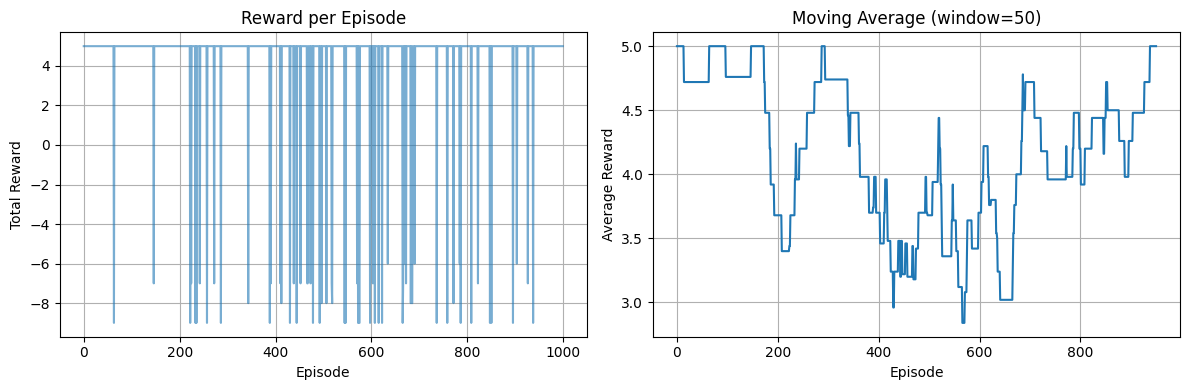

/tmp/ipython-input-3476584179.py:221: UserWarning: Glyph 129472 (\N{CHEESE WEDGE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


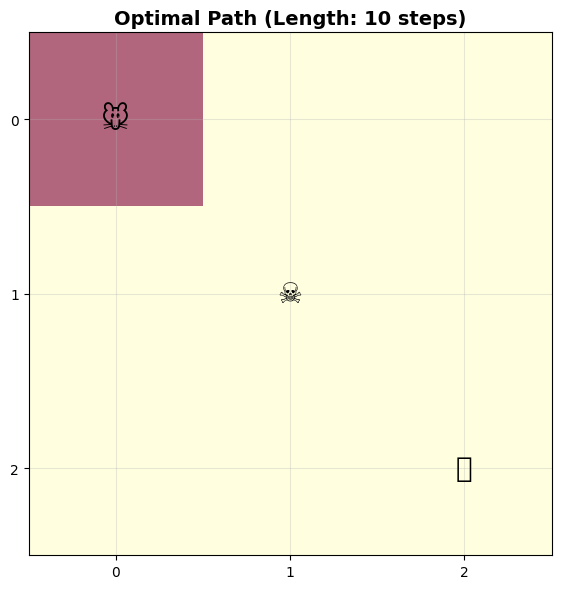

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from collections import deque

# Environment Setup
class MouseMaze:
    def __init__(self):
        # 3x3 maze grid
        # States: 0-8 (0=start/mouse position, 8=cheese goal, 4=poison)
        self.grid_size = 3
        self.total_states = 9
        self.actions = ['←', '→', '↑', '↓']  # Left, Right, Up, Down
        self.num_actions = 4

        # Position mapping
        self.start_pos = 0
        self.poison_pos = 4
        self.goal_pos = 8
        self.max_steps = 5

    def pos_to_coord(self, pos):
        """Convert position to (row, col)"""
        return (pos // 3, pos % 3)

    def coord_to_pos(self, row, col):
        """Convert (row, col) to position"""
        if 0 <= row < 3 and 0 <= col < 3:
            return row * 3 + col
        return None

    def get_next_state(self, state, action):
        """Get next state after taking action"""
        row, col = self.pos_to_coord(state)

        if action == 0:  # Left
            col -= 1
        elif action == 1:  # Right
            col += 1
        elif action == 2:  # Up
            row -= 1
        elif action == 3:  # Down
            row += 1

        next_pos = self.coord_to_pos(row, col)
        return next_pos if next_pos is not None else state

    def get_reward(self, state, next_state):
        """Get reward based on next state"""
        if next_state == self.goal_pos:
            return 10  # Big pile of cheese
        elif next_state == self.poison_pos:
            return -10  # Poison
        else:
            return 1  # Small cheese

    def is_terminal(self, state, steps):
        """Check if episode is terminal"""
        return state == self.poison_pos or state == self.goal_pos or steps >= self.max_steps

# Q-Learning Algorithm
class QLearningAgent:
    def __init__(self, env, learning_rate=0.1, discount_rate=0.99, epsilon=0.1):
        self.env = env
        self.lr = learning_rate  # Learning rate (alpha)
        self.gamma = discount_rate  # Discount rate (gamma)
        self.epsilon = epsilon  # Exploration rate

        # Initialize Q-table with zeros
        self.Q = np.zeros((env.total_states, env.num_actions))

        # Track rewards per episode
        self.episode_rewards = []

    def choose_action(self, state):
        """Epsilon-greedy action selection"""
        if np.random.rand() < self.epsilon:
            # Explore: random action
            return np.random.randint(0, self.env.num_actions)
        else:
            # Exploit: best action
            return np.argmax(self.Q[state])

    def update_Q(self, state, action, reward, next_state, done, verbose=False):
        """Update Q-value using Bellman Equation"""
        old_q_value = self.Q[state, action]

        # Bellman Equation: Q(s,a) ← Q(s,a) + α[r + γmax_a'(Q(s',a')) - Q(s,a)]
        if done:
            target = reward
            max_next_q = 0
        else:
            max_next_q = np.max(self.Q[next_state])
            target = reward + self.gamma * max_next_q

        td_error = target - old_q_value
        new_q_value = old_q_value + self.lr * td_error
        self.Q[state, action] = new_q_value

        if verbose:
            print(f"Q({state},{action}): {old_q_value:.2f} + {self.lr}×({reward}+{self.gamma:.2f}×{max_next_q:.2f}-{old_q_value:.2f}) = {new_q_value:.2f}")

    def train(self, episodes=1000):
        """Train the agent"""
        print("Training Q-Learning Agent...")
        for episode in range(episodes):
            state = self.env.start_pos
            episode_reward = 0
            steps = 0

            while True:
                action = self.choose_action(state)
                next_state = self.env.get_next_state(state, action)
                reward = self.env.get_reward(state, next_state)
                done = self.env.is_terminal(next_state, steps + 1)

                # Show calculation details for first few episodes
                verbose = (episode < 3)
                self.update_Q(state, action, reward, next_state, done, verbose=verbose)

                episode_reward += reward
                state = next_state
                steps += 1

                if done:
                    break

            self.episode_rewards.append(episode_reward)

            if (episode + 1) % 250 == 0:
                avg_reward = np.mean(self.episode_rewards[-250:])
                print(f"Episode {episode + 1}/{episodes} | Avg Reward: {avg_reward:.2f}")

    def get_optimal_path(self, max_steps=10):
        """Get optimal path from start to goal using learned policy"""
        state = self.env.start_pos
        path = [state]
        steps = 0

        while state != self.env.goal_pos and steps < max_steps:
            action = np.argmax(self.Q[state])
            state = self.env.get_next_state(state, action)
            path.append(state)
            steps += 1

            if state == self.env.poison_pos:
                break

        return path

    def display_Q_table(self):
        """Display Q-table nicely"""
        print("\n" + "="*60)
        print("Q-TABLE (State-Action Values)")
        print("="*60)
        actions_names = ['←', '→', '↑', '↓']

        for state in range(self.env.total_states):
            row, col = self.env.pos_to_coord(state)
            print(f"\nState {state} (Row {row}, Col {col}):")
            for action in range(self.env.num_actions):
                print(f"  {actions_names[action]} : {self.Q[state, action]:7.3f}", end="  ")
                if (action + 1) % 2 == 0:
                    print()

# Visualization Functions
def plot_training_rewards(agent):
    """Plot learning progress"""
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(agent.episode_rewards, alpha=0.6)
    plt.xlabel('Episode')
    plt.ylabel('Total Reward')
    plt.title('Reward per Episode')
    plt.grid(True)

    plt.subplot(1, 2, 2)
    window = 50
    moving_avg = np.convolve(agent.episode_rewards, np.ones(window)/window, mode='valid')
    plt.plot(moving_avg)
    plt.xlabel('Episode')
    plt.ylabel('Average Reward')
    plt.title(f'Moving Average (window={window})')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

def visualize_optimal_path(env, agent):
    """Visualize the optimal path in the maze"""
    path = agent.get_optimal_path()

    grid = np.zeros((3, 3))

    # Mark positions
    for i, pos in enumerate(path):
        row, col = env.pos_to_coord(pos)
        grid[row, col] = i + 1

    plt.figure(figsize=(6, 6))
    plt.imshow(grid, cmap='YlOrRd', alpha=0.6)

    # Add labels
    for i in range(3):
        for j in range(3):
            pos = i * 3 + j
            if pos == env.start_pos:
                plt.text(j, i, '🐭', ha='center', va='center', fontsize=20)
            elif pos == env.goal_pos:
                plt.text(j, i, '🧀', ha='center', va='center', fontsize=20)
            elif pos == env.poison_pos:
                plt.text(j, i, '☠️', ha='center', va='center', fontsize=20)
            elif grid[i, j] > 0:
                plt.text(j, i, f'{int(grid[i, j])}', ha='center', va='center',
                        fontsize=14, fontweight='bold', color='white')

    plt.title(f'Optimal Path (Length: {len(path)-1} steps)', fontsize=14, fontweight='bold')
    plt.xticks(range(3))
    plt.yticks(range(3))
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

def demonstrate_bellman_equation():
    """Show Bellman equation explanation"""
    print("\n" + "="*60)
    print("BELLMAN EQUATION")
    print("="*60)
    print("\nQ(St, At) ← Q(St, At) + α[Rt+1 + γ·max_a(Q(St+1, a)) - Q(St, At)]")
    print("\nVariables:")
    print("  α=0.1 (learning rate) | γ=0.99 (discount factor)")
    print("  Rt+1 (immediate reward) | max_a(Q) (best future reward)")
    print("\nExample: Q(2,Down) = 0 + 0.1×[-10 + 0.99×0 - 0] = -1")
    print("="*60 + "\n")

# Main Execution
if __name__ == "__main__":
    # Show Bellman equation explanation
    demonstrate_bellman_equation()
    # Initialize environment and agent
    env = MouseMaze()
    agent = QLearningAgent(env, learning_rate=0.1, discount_rate=0.99, epsilon=0.2)

    # Train the agent
    agent.train(episodes=1000)

    # Display results
    print("\n" + "="*60)
    print("TRAINING COMPLETE")
    print("="*60)
    agent.display_Q_table()

    # Get and display optimal path
    optimal_path = agent.get_optimal_path()
    print(f"\n\nOptimal Path: {' → '.join(map(str, optimal_path))}")
    print(f"Path Length: {len(optimal_path) - 1} steps")

    # Visualizations
    plot_training_rewards(agent)
    visualize_optimal_path(env, agent)


BELLMAN EQUATION

Q(St, At) ← Q(St, At) + α[Rt+1 + γ·max_a(Q(St+1, a)) - Q(St, At)]

Variables:
  α=0.1 (learning rate) | γ=0.99 (discount factor)
  Rt+1 (immediate reward) | max_a(Q) (best future reward)

Example: Q(2,↓) = 0 + 0.1×[-10 + 0.99×0 - 0] = -1

Training Q-Learning Agent...
Episode 500/2000 | Success: 0.0% | Avg Reward: -0.42
Episode 1000/2000 | Success: 0.0% | Avg Reward: 0.00
Episode 1500/2000 | Success: 0.0% | Avg Reward: 0.00
Episode 2000/2000 | Success: 0.0% | Avg Reward: 0.00

TRAINING COMPLETE

Q-TABLE (State-Action Values)

State 0 (Row 0, Col 0) [START]:
  ← :   0.000    → :   0.000  
  ↑ :   0.000    ↓ :   0.000  

State 1 (Row 0, Col 1):
  ← :   0.000    → :   0.000  
  ↑ :   0.000    ↓ :  -2.710  

State 2 (Row 0, Col 2):
  ← :   0.000    → :   0.000  
  ↑ :   0.000    ↓ :   0.000  

State 3 (Row 1, Col 0):
  ← :   0.000    → :  -8.499  
  ↑ :   0.000    ↓ :   0.000  

State 4 (Row 1, Col 1) [POISON]:
  ← :   0.000    → :   0.000  
  ↑ :   0.000    ↓ :   0.000  

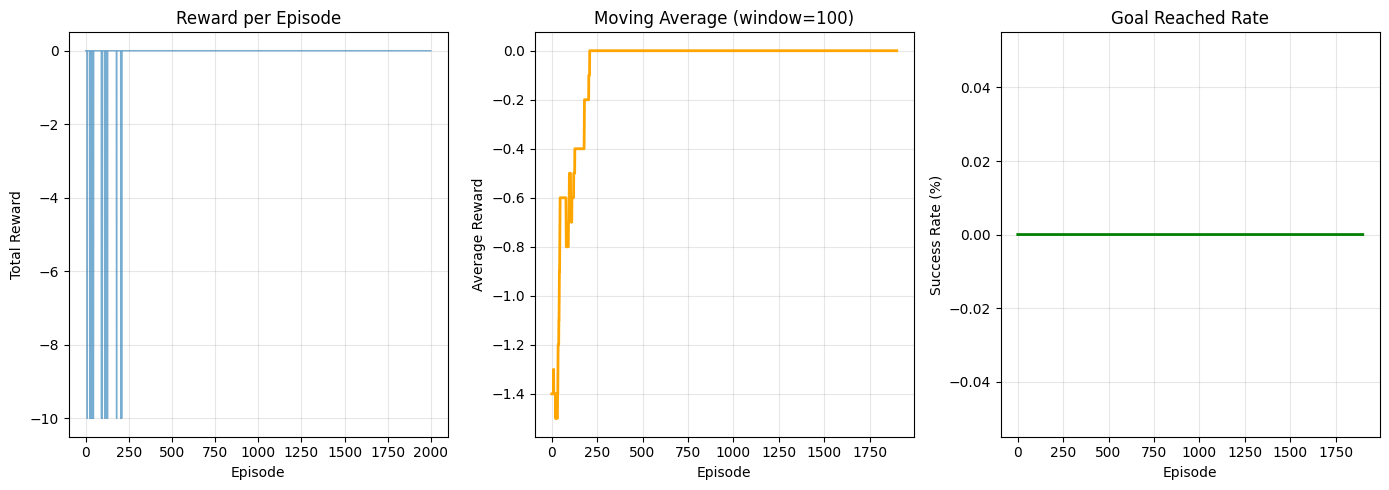


Optimal Path: 0 → 0 → 0 → 0 → 0 → 0 → 0 → 0 → 0 → 0 → 0
Path Length: 10 steps
⊘ Did not reach goal


/tmp/ipython-input-1828548815.py:242: UserWarning: Glyph 129472 (\N{CHEESE WEDGE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129472 (\N{CHEESE WEDGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


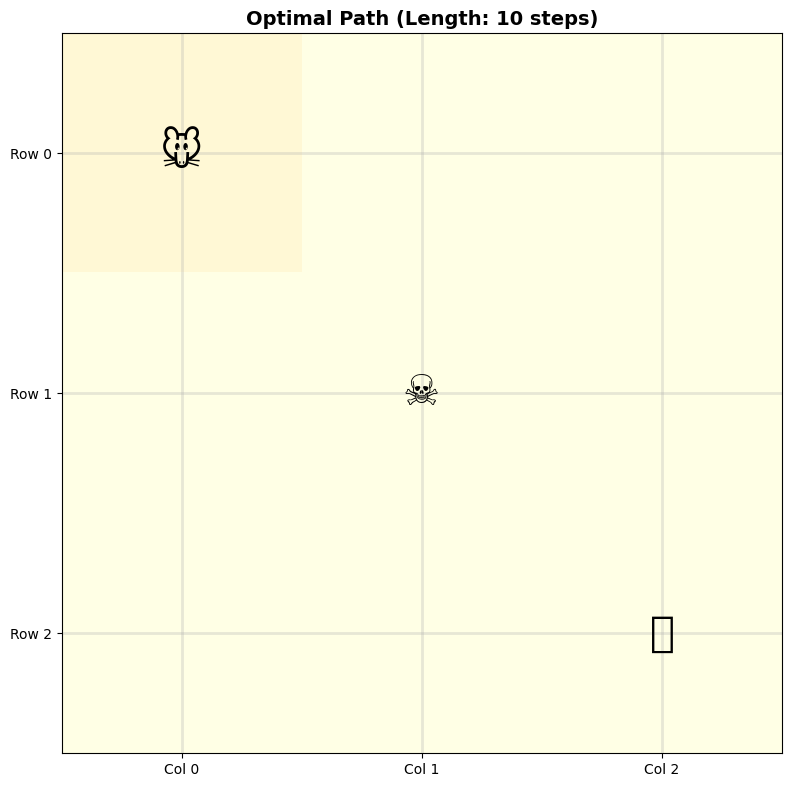

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

# Environment Setup
class MouseMaze:
    def __init__(self):
        # 3x3 maze grid
        self.grid_size = 3
        self.total_states = 9
        self.actions = ['←', '→', '↑', '↓']  # Left, Right, Up, Down
        self.num_actions = 4

        # Position mapping
        self.start_pos = 0
        self.poison_pos = 4
        self.goal_pos = 8
        self.max_steps = 10

    def pos_to_coord(self, pos):
        """Convert position to (row, col)"""
        return (pos // 3, pos % 3)

    def coord_to_pos(self, row, col):
        """Convert (row, col) to position"""
        if 0 <= row < 3 and 0 <= col < 3:
            return row * 3 + col
        return None

    def get_next_state(self, state, action):
        """Get next state after taking action"""
        row, col = self.pos_to_coord(state)

        if action == 0:  # Left
            col -= 1
        elif action == 1:  # Right
            col += 1
        elif action == 2:  # Up
            row -= 1
        elif action == 3:  # Down
            row += 1

        next_pos = self.coord_to_pos(row, col)
        return next_pos if next_pos is not None else state

    def get_reward(self, state, next_state):
        """Get reward based on next state"""
        if next_state == self.goal_pos:
            return 10  # Big pile of cheese
        elif next_state == self.poison_pos:
            return -10  # Poison
        else:
            return 0  # Neutral movement

    def is_terminal(self, state, steps):
        """Check if episode is terminal"""
        return state == self.poison_pos or state == self.goal_pos or steps >= self.max_steps

# Q-Learning Algorithm
class QLearningAgent:
    def __init__(self, env, learning_rate=0.1, discount_rate=0.99, epsilon=0.3):
        self.env = env
        self.lr = learning_rate  # Learning rate (alpha)
        self.gamma = discount_rate  # Discount rate (gamma)
        self.epsilon = epsilon  # Exploration rate
        self.epsilon_decay = 0.995  # Decay exploration over time

        # Initialize Q-table with zeros
        self.Q = np.zeros((env.total_states, env.num_actions))

        # Track rewards and successes
        self.episode_rewards = []
        self.goal_reached = []

    def choose_action(self, state):
        """Epsilon-greedy action selection"""
        if np.random.rand() < self.epsilon:
            return np.random.randint(0, self.env.num_actions)
        else:
            return np.argmax(self.Q[state])

    def update_Q(self, state, action, reward, next_state, done):
        """Update Q-value using Bellman Equation"""
        if done:
            target = reward
        else:
            target = reward + self.gamma * np.max(self.Q[next_state])

        # Q(s,a) = Q(s,a) + α[r + γmax(Q(s',a')) - Q(s,a)]
        self.Q[state, action] += self.lr * (target - self.Q[state, action])

    def train(self, episodes=2000):
        """Train the agent"""
        print("Training Q-Learning Agent...")
        for episode in range(episodes):
            state = self.env.start_pos
            episode_reward = 0
            steps = 0
            reached_goal = False

            while True:
                action = self.choose_action(state)
                next_state = self.env.get_next_state(state, action)
                reward = self.env.get_reward(state, next_state)
                done = self.env.is_terminal(next_state, steps + 1)

                self.update_Q(state, action, reward, next_state, done)

                episode_reward += reward
                state = next_state
                steps += 1

                if state == self.env.goal_pos:
                    reached_goal = True

                if done:
                    break

            self.episode_rewards.append(episode_reward)
            self.goal_reached.append(1 if reached_goal else 0)

            # Decay epsilon
            self.epsilon *= self.epsilon_decay

            if (episode + 1) % 500 == 0:
                success_rate = np.mean(self.goal_reached[-500:]) * 100
                avg_reward = np.mean(self.episode_rewards[-500:])
                print(f"Episode {episode + 1}/{episodes} | Success: {success_rate:.1f}% | Avg Reward: {avg_reward:.2f}")

    def get_optimal_path(self, max_steps=10):
        """Get optimal path from start to goal using learned policy"""
        state = self.env.start_pos
        path = [state]
        steps = 0

        while state != self.env.goal_pos and steps < max_steps:
            action = np.argmax(self.Q[state])
            state = self.env.get_next_state(state, action)
            path.append(state)
            steps += 1

            if state == self.env.poison_pos:
                break

        return path

    def display_Q_table(self):
        """Display Q-table nicely"""
        print("\n" + "="*60)
        print("Q-TABLE (State-Action Values)")
        print("="*60)
        actions_names = ['←', '→', '↑', '↓']

        for state in range(self.env.total_states):
            row, col = self.env.pos_to_coord(state)
            status = ""
            if state == self.env.start_pos:
                status = " [START]"
            elif state == self.env.goal_pos:
                status = " [GOAL]"
            elif state == self.env.poison_pos:
                status = " [POISON]"

            print(f"\nState {state} (Row {row}, Col {col}){status}:")
            for i, action in enumerate(actions_names):
                print(f"  {action} : {self.Q[state, i]:7.3f}", end="  ")
                if (i + 1) % 2 == 0:
                    print()

# Visualization Functions
def plot_training_rewards(agent):
    """Plot learning progress"""
    plt.figure(figsize=(14, 5))

    plt.subplot(1, 3, 1)
    plt.plot(agent.episode_rewards, alpha=0.6, linewidth=1)
    plt.xlabel('Episode')
    plt.ylabel('Total Reward')
    plt.title('Reward per Episode')
    plt.grid(True, alpha=0.3)

    plt.subplot(1, 3, 2)
    window = 100
    moving_avg = np.convolve(agent.episode_rewards, np.ones(window)/window, mode='valid')
    plt.plot(moving_avg, linewidth=2, color='orange')
    plt.xlabel('Episode')
    plt.ylabel('Average Reward')
    plt.title(f'Moving Average (window={window})')
    plt.grid(True, alpha=0.3)

    plt.subplot(1, 3, 3)
    success_rate = np.convolve(agent.goal_reached, np.ones(window)/window, mode='valid') * 100
    plt.plot(success_rate, linewidth=2, color='green')
    plt.xlabel('Episode')
    plt.ylabel('Success Rate (%)')
    plt.title('Goal Reached Rate')
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

def visualize_optimal_path(env, agent):
    """Visualize the optimal path in the maze"""
    path = agent.get_optimal_path()

    print(f"\nOptimal Path: {' → '.join(map(str, path))}")
    print(f"Path Length: {len(path) - 1} steps")
    if path[-1] == env.goal_pos:
        print("✓ Successfully reached GOAL!")
    elif path[-1] == env.poison_pos:
        print("✗ Reached POISON - Poor policy")
    else:
        print("⊘ Did not reach goal")

    grid = np.zeros((3, 3))
    for i, pos in enumerate(path):
        row, col = env.pos_to_coord(pos)
        if grid[row, col] == 0:
            grid[row, col] = i + 1

    plt.figure(figsize=(8, 8))
    plt.imshow(grid, cmap='YlOrRd', alpha=0.5, vmin=0, vmax=len(path))

    # Add grid lines and labels
    for i in range(3):
        for j in range(3):
            pos = i * 3 + j
            if pos == env.start_pos:
                plt.text(j, i, '🐭', ha='center', va='center', fontsize=30)
            elif pos == env.goal_pos:
                plt.text(j, i, '🧀', ha='center', va='center', fontsize=30)
            elif pos == env.poison_pos:
                plt.text(j, i, '☠️', ha='center', va='center', fontsize=30)
            elif grid[i, j] > 0 and pos not in [env.start_pos, env.goal_pos, env.poison_pos]:
                plt.text(j, i, f'{int(grid[i, j])}', ha='center', va='center',
                        fontsize=16, fontweight='bold', color='darkred')

    plt.title(f'Optimal Path (Length: {len(path)-1} steps)', fontsize=14, fontweight='bold')
    plt.xticks(range(3), labels=['Col 0', 'Col 1', 'Col 2'])
    plt.yticks(range(3), labels=['Row 0', 'Row 1', 'Row 2'])
    plt.grid(True, alpha=0.3, linewidth=2)
    plt.tight_layout()
    plt.show()

def demonstrate_bellman_equation():
    """Show Bellman equation explanation"""
    print("\n" + "="*60)
    print("BELLMAN EQUATION")
    print("="*60)
    print("\nQ(St, At) ← Q(St, At) + α[Rt+1 + γ·max_a(Q(St+1, a)) - Q(St, At)]")
    print("\nVariables:")
    print("  α=0.1 (learning rate) | γ=0.99 (discount factor)")
    print("  Rt+1 (immediate reward) | max_a(Q) (best future reward)")
    print("\nExample: Q(2,↓) = 0 + 0.1×[-10 + 0.99×0 - 0] = -1")
    print("="*60 + "\n")

# Main Execution
if __name__ == "__main__":
    demonstrate_bellman_equation()

    # Initialize environment and agent
    env = MouseMaze()
    agent = QLearningAgent(env, learning_rate=0.1, discount_rate=0.99, epsilon=0.3)

    # Train the agent
    agent.train(episodes=2000)

    # Display results
    print("\n" + "="*60)
    print("TRAINING COMPLETE")
    print("="*60)
    agent.display_Q_table()

    # Visualizations
    plot_training_rewards(agent)
    visualize_optimal_path(env, agent)


BELLMAN EQUATION

Q(St, At) ← Q(St, At) + α[Rt+1 + γ·max_a(Q(St+1, a)) - Q(St, At)]

Variables:
  α=0.1 (learning rate) | γ=0.99 (discount factor)
  Rt+1 (immediate reward) | max_a(Q) (best future reward)

Example: Q(2,↓) = 0 + 0.1×[-10 + 0.99×0 - 0] = -1

Training Q-Learning Agent...
Episode 500/2000 | Success: 39.2% | Avg Reward: 9.25
Episode 1000/2000 | Success: 98.8% | Avg Reward: 12.80
Episode 1500/2000 | Success: 99.8% | Avg Reward: 12.99
Episode 2000/2000 | Success: 100.0% | Avg Reward: 13.00

TRAINING COMPLETE

Q-TABLE (State-Action Values)

State 0 (Row 0, Col 0) [START]:
  ← :   9.751    → :   3.606  
  ↑ :   6.617    ↓ :  12.673  

State 1 (Row 0, Col 1):
  ← :   1.231    → :   4.537  
  ↑ :   0.027    ↓ :  -2.710  

State 2 (Row 0, Col 2):
  ← :   5.232    → :   0.149  
  ↑ :   0.808    ↓ :   0.862  

State 3 (Row 1, Col 0):
  ← :   8.421    → :  -9.948  
  ↑ :   9.819    ↓ :  11.791  

State 4 (Row 1, Col 1) [POISON]:
  ← :   0.000    → :   0.000  
  ↑ :   0.000    ↓ :   

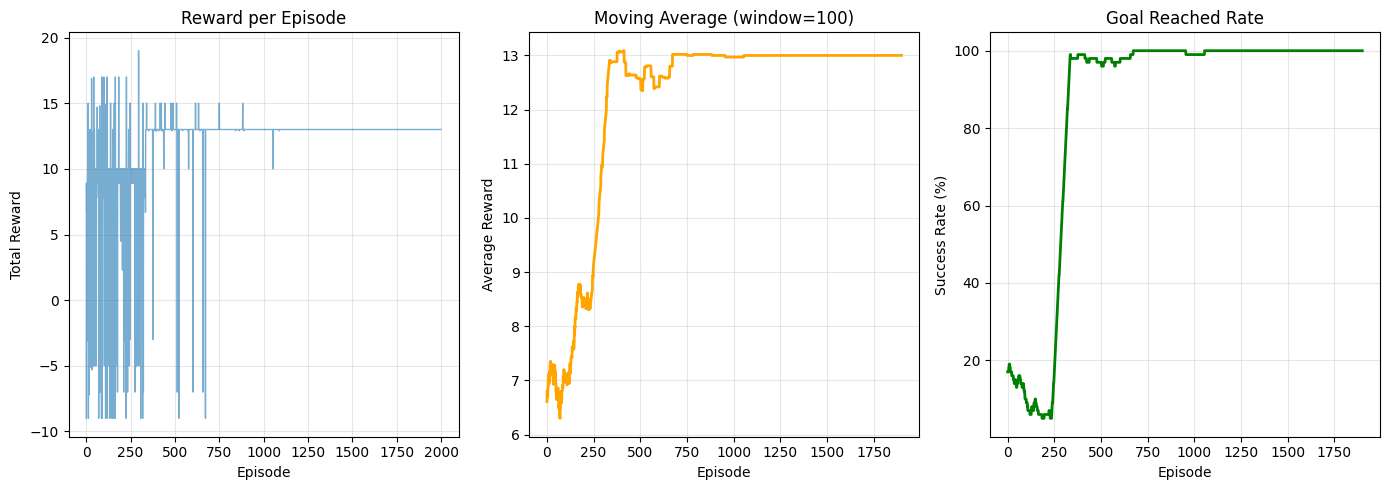


Optimal Path: 0 → 3 → 6 → 7 → 8
Path Length: 4 steps
✓ Successfully reached GOAL!


/tmp/ipython-input-2962524564.py:253: UserWarning: Glyph 129472 (\N{CHEESE WEDGE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129472 (\N{CHEESE WEDGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


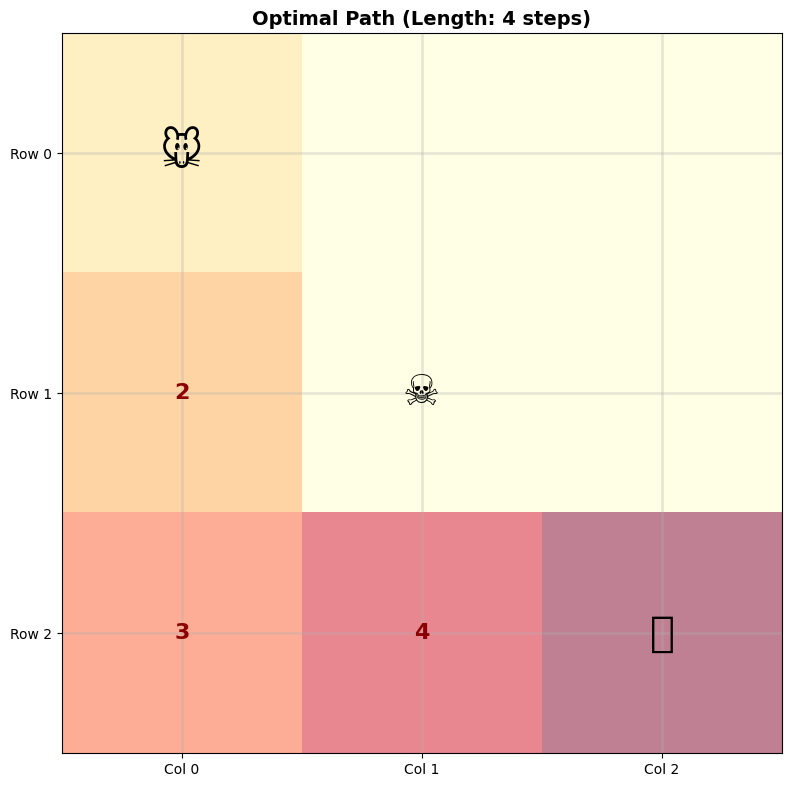

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

# Environment Setup
class MouseMaze:
    def __init__(self):
        # 3x3 maze grid
        self.grid_size = 3
        self.total_states = 9
        self.actions = ['←', '→', '↑', '↓']  # Left, Right, Up, Down
        self.num_actions = 4

        # Position mapping
        self.start_pos = 0
        self.poison_pos = 4
        self.goal_pos = 8
        self.max_steps = 10

    def pos_to_coord(self, pos):
        """Convert position to (row, col)"""
        return (pos // 3, pos % 3)

    def coord_to_pos(self, row, col):
        """Convert (row, col) to position"""
        if 0 <= row < 3 and 0 <= col < 3:
            return row * 3 + col
        return None

    def get_next_state(self, state, action):
        """Get next state after taking action"""
        row, col = self.pos_to_coord(state)

        if action == 0:  # Left
            col -= 1
        elif action == 1:  # Right
            col += 1
        elif action == 2:  # Up
            row -= 1
        elif action == 3:  # Down
            row += 1

        next_pos = self.coord_to_pos(row, col)
        return next_pos if next_pos is not None else state

    def get_reward(self, state, next_state):
        """Get reward based on next state"""
        if next_state == self.goal_pos:
            return 10  # Big pile of cheese
        elif next_state == self.poison_pos:
            return -10  # Poison
        elif next_state == state:
            return -0.1  # Penalty for hitting wall (staying in same state)
        else:
            return 1  # Small reward for moving

    def is_terminal(self, state, steps):
        """Check if episode is terminal"""
        return state == self.poison_pos or state == self.goal_pos or steps >= self.max_steps

# Q-Learning Algorithm
class QLearningAgent:
    def __init__(self, env, learning_rate=0.1, discount_rate=0.99, epsilon=0.3):
        self.env = env
        self.lr = learning_rate  # Learning rate (alpha)
        self.gamma = discount_rate  # Discount rate (gamma)
        self.epsilon = epsilon  # Exploration rate
        self.epsilon_decay = 0.995  # Decay exploration over time

        # Initialize Q-table with zeros
        self.Q = np.zeros((env.total_states, env.num_actions))

        # Track rewards and successes
        self.episode_rewards = []
        self.goal_reached = []

    def choose_action(self, state):
        """Epsilon-greedy action selection"""
        if np.random.rand() < self.epsilon:
            return np.random.randint(0, self.env.num_actions)
        else:
            # Break ties randomly
            q_values = self.Q[state]
            max_q = np.max(q_values)
            best_actions = np.where(q_values == max_q)[0]
            return np.random.choice(best_actions)

    def update_Q(self, state, action, reward, next_state, done):
        """Update Q-value using Bellman Equation"""
        if done:
            target = reward
        else:
            target = reward + self.gamma * np.max(self.Q[next_state])

        # Q(s,a) = Q(s,a) + α[r + γmax(Q(s',a')) - Q(s,a)]
        self.Q[state, action] += self.lr * (target - self.Q[state, action])

    def train(self, episodes=2000):
        """Train the agent"""
        print("Training Q-Learning Agent...")
        for episode in range(episodes):
            state = self.env.start_pos
            episode_reward = 0
            steps = 0
            reached_goal = False

            while True:
                action = self.choose_action(state)
                next_state = self.env.get_next_state(state, action)
                reward = self.env.get_reward(state, next_state)
                done = self.env.is_terminal(next_state, steps + 1)

                self.update_Q(state, action, reward, next_state, done)

                episode_reward += reward
                state = next_state
                steps += 1

                if state == self.env.goal_pos:
                    reached_goal = True

                if done:
                    break

            self.episode_rewards.append(episode_reward)
            self.goal_reached.append(1 if reached_goal else 0)

            # Decay epsilon
            self.epsilon *= self.epsilon_decay

            if (episode + 1) % 500 == 0:
                success_rate = np.mean(self.goal_reached[-500:]) * 100
                avg_reward = np.mean(self.episode_rewards[-500:])
                print(f"Episode {episode + 1}/{episodes} | Success: {success_rate:.1f}% | Avg Reward: {avg_reward:.2f}")

    def get_optimal_path(self, max_steps=10):
        """Get optimal path from start to goal using learned policy"""
        state = self.env.start_pos
        path = [state]
        steps = 0

        while state != self.env.goal_pos and steps < max_steps:
            q_values = self.Q[state]
            max_q = np.max(q_values)
            best_actions = np.where(q_values == max_q)[0]
            action = best_actions[0]  # Take first best action (deterministic)

            next_state = self.env.get_next_state(state, action)
            path.append(next_state)
            state = next_state
            steps += 1

            if state == self.env.poison_pos:
                break

        return path

    def display_Q_table(self):
        """Display Q-table nicely"""
        print("\n" + "="*60)
        print("Q-TABLE (State-Action Values)")
        print("="*60)
        actions_names = ['←', '→', '↑', '↓']

        for state in range(self.env.total_states):
            row, col = self.env.pos_to_coord(state)
            status = ""
            if state == self.env.start_pos:
                status = " [START]"
            elif state == self.env.goal_pos:
                status = " [GOAL]"
            elif state == self.env.poison_pos:
                status = " [POISON]"

            print(f"\nState {state} (Row {row}, Col {col}){status}:")
            for i, action in enumerate(actions_names):
                print(f"  {action} : {self.Q[state, i]:7.3f}", end="  ")
                if (i + 1) % 2 == 0:
                    print()

# Visualization Functions
def plot_training_rewards(agent):
    """Plot learning progress"""
    plt.figure(figsize=(14, 5))

    plt.subplot(1, 3, 1)
    plt.plot(agent.episode_rewards, alpha=0.6, linewidth=1)
    plt.xlabel('Episode')
    plt.ylabel('Total Reward')
    plt.title('Reward per Episode')
    plt.grid(True, alpha=0.3)

    plt.subplot(1, 3, 2)
    window = 100
    moving_avg = np.convolve(agent.episode_rewards, np.ones(window)/window, mode='valid')
    plt.plot(moving_avg, linewidth=2, color='orange')
    plt.xlabel('Episode')
    plt.ylabel('Average Reward')
    plt.title(f'Moving Average (window={window})')
    plt.grid(True, alpha=0.3)

    plt.subplot(1, 3, 3)
    success_rate = np.convolve(agent.goal_reached, np.ones(window)/window, mode='valid') * 100
    plt.plot(success_rate, linewidth=2, color='green')
    plt.xlabel('Episode')
    plt.ylabel('Success Rate (%)')
    plt.title('Goal Reached Rate')
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

def visualize_optimal_path(env, agent):
    """Visualize the optimal path in the maze"""
    path = agent.get_optimal_path()

    print(f"\nOptimal Path: {' → '.join(map(str, path))}")
    print(f"Path Length: {len(path) - 1} steps")
    if path[-1] == env.goal_pos:
        print("✓ Successfully reached GOAL!")
    elif path[-1] == env.poison_pos:
        print("✗ Reached POISON - Poor policy")
    else:
        print("⊘ Did not reach goal")

    grid = np.zeros((3, 3))
    for i, pos in enumerate(path):
        row, col = env.pos_to_coord(pos)
        if grid[row, col] == 0:
            grid[row, col] = i + 1

    plt.figure(figsize=(8, 8))
    plt.imshow(grid, cmap='YlOrRd', alpha=0.5, vmin=0, vmax=len(path))

    # Add grid lines and labels
    for i in range(3):
        for j in range(3):
            pos = i * 3 + j
            if pos == env.start_pos:
                plt.text(j, i, '🐭', ha='center', va='center', fontsize=30)
            elif pos == env.goal_pos:
                plt.text(j, i, '🧀', ha='center', va='center', fontsize=30)
            elif pos == env.poison_pos:
                plt.text(j, i, '☠️', ha='center', va='center', fontsize=30)
            elif grid[i, j] > 0 and pos not in [env.start_pos, env.goal_pos, env.poison_pos]:
                plt.text(j, i, f'{int(grid[i, j])}', ha='center', va='center',
                        fontsize=16, fontweight='bold', color='darkred')

    plt.title(f'Optimal Path (Length: {len(path)-1} steps)', fontsize=14, fontweight='bold')
    plt.xticks(range(3), labels=['Col 0', 'Col 1', 'Col 2'])
    plt.yticks(range(3), labels=['Row 0', 'Row 1', 'Row 2'])
    plt.grid(True, alpha=0.3, linewidth=2)
    plt.tight_layout()
    plt.show()

def demonstrate_bellman_equation():
    """Show Bellman equation explanation"""
    print("\n" + "="*60)
    print("BELLMAN EQUATION")
    print("="*60)
    print("\nQ(St, At) ← Q(St, At) + α[Rt+1 + γ·max_a(Q(St+1, a)) - Q(St, At)]")
    print("\nVariables:")
    print("  α=0.1 (learning rate) | γ=0.99 (discount factor)")
    print("  Rt+1 (immediate reward) | max_a(Q) (best future reward)")
    print("\nExample: Q(2,↓) = 0 + 0.1×[-10 + 0.99×0 - 0] = -1")
    print("="*60 + "\n")

# Main Execution
if __name__ == "__main__":
    demonstrate_bellman_equation()

    # Initialize environment and agent
    env = MouseMaze()
    agent = QLearningAgent(env, learning_rate=0.1, discount_rate=0.99, epsilon=0.3)

    # Train the agent
    agent.train(episodes=2000)

    # Display results
    print("\n" + "="*60)
    print("TRAINING COMPLETE")
    print("="*60)
    agent.display_Q_table()

    # Visualizations
    plot_training_rewards(agent)
    visualize_optimal_path(env, agent)